# Linear Regression

- Data modelling with linear regression
- Build some linea regression models
- Understand multiple regression and multicollinearity

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
bikes = pd.read_csv('data/bikeshare.csv', index_col = 'datetime' , parse_dates = True )

In [8]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
# Each observation is an hour of events  -> how many bikes were rented in a given hour

In [10]:
# rename the count column to total_rentals 
bikes.rename(columns={'count':'total_rentals'}, inplace=True)

## Visualize our data

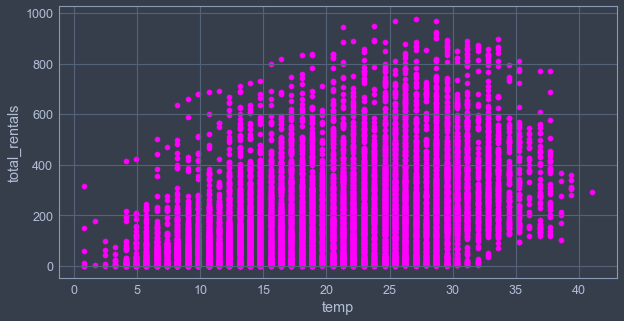

In [14]:
# Scatterplot of a relationship between temp and total_rentals 
bikes.plot(kind='scatter', x='temp', y='total_rentals', color='fuchsia', s =30, figsize = (10,5))

In [ ]:
total_rentals = 5 * temp # machine learning model

temp = 1 
#what is my total_rentals
total_rentals = 5



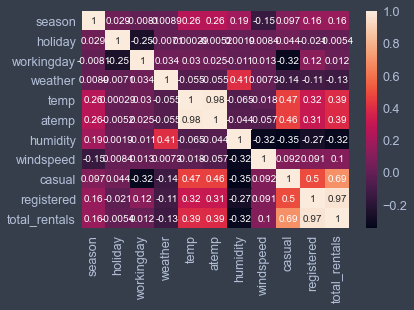

In [17]:
sns.heatmap(bikes.corr(), annot=True)

## Build a linear regression model with scikit - learn

In [18]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


- features and our responses are going to be separate objects
- every feature and response should only be numeric
- every feature and response should be numpy array or something very similar like a pandas Series

In [23]:
#Create X and y
feature_cols = ['temp']

X = bikes[feature_cols]
y = bikes['total_rentals']

In [25]:
#Check the type of x and y 
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [26]:
#Check the shape ?  
X.shape


(10886, 1)

In [27]:
y.shape

(10886,)

## Four steps to creating a linear regression model with sklearn

**Step1:** Impor the LinearRegression model from the library

In [30]:
from sklearn.linear_model import LinearRegression

**Step2:** Intantiate the estimator

- Instaniate : We will make an instance of ... 
- Estimator: Sklearn refers to as model

In [31]:
lr = LinearRegression()

In [32]:
type(lr)

sklearn.linear_model._base.LinearRegression

#### Define what we have created
- We have craeted an object that knows how to do linear regression

In [33]:
lr2 = LinearRegression()

In [34]:
type(lr2)

sklearn.linear_model._base.LinearRegression

**Step3:** Fit data to the object

In [37]:
lr.fit(X, y)

LinearRegression()

This is called now a fitted model

**Step4:**: Predict 

In [39]:
lr.predict(np.array([1]).reshape(-1, 1))

array([15.21675344])

In [ ]:
total_rentals  = 6 + 9.17 * temp

# Interpretation of the model 

In [ ]:
# Understanding the coefficents
# total_rentals = intercept + coef * temp 

In [42]:
# What are the total_rentals if temperature is 0 
# the intrcept
lr.intercept_

6.046212959616838

In [43]:
#coefficents
lr.coef_

array([9.17054048])

Interpreation of the coeffient  ? 

If your temperature increases by 1 then your total_rentals will go up by 9.17

However that doesn't mean that there is a causation 


In [49]:
# Make a prediction for the temperature of 25

#Manually using the coeffiencts
print(lr.coef_ * 25 + lr.intercept_)

#Using the predict method
print(lr.predict(np.array(25).reshape(-1,1)))

[235.309725]
[235.309725]


# Does the scale matter ?

In [50]:
# What would happen if the temperature was in Fahrenheit ? 

In [51]:
bikes['temp_F'] = bikes['temp'] * 1.8 + 32

In [53]:
# Follow the 4 steps and create linear model with the fahrenheit feature 

In [54]:
# Make a prediction for 25 Celcius or 77 Fahrenheit 

In [59]:
#Step1:
feature_cols = ['temp_F']
X = bikes[feature_cols]
y = bikes['total_rentals']

#Intantiate a model
linreg = LinearRegression()

#Fit data to the model
linreg.fit(X, y) 

#Predict ?
linreg.predict(np.array([77]).reshape(1,-1))



array([235.309725])

# Work with Multiple Features

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
import seaborn as sns

In [62]:
bikes.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_rentals',
       'temp_F'],
      dtype='object')

In [63]:
# Create a list with new features
feature_cols = ['temp','season','weather','humidity']

In [64]:
#Visual of our data 

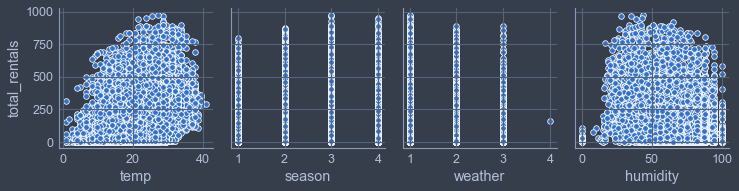

In [65]:
sns.pairplot(bikes, x_vars = feature_cols, y_vars = 'total_rentals', kind='scatter')

 season : season (1:springer, 2:summer, 3:fall, 4:winter)
 <p>weather :
 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

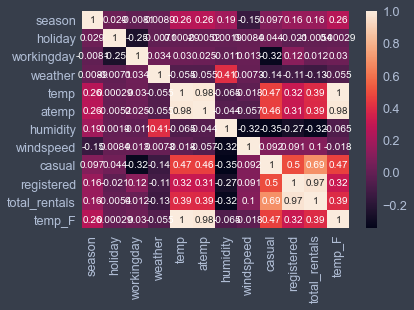

In [66]:
sns.heatmap(bikes.corr(), annot=True)

In [ ]:
#Capture our observations
# With more humidity we have less total rentals
# with more temperature we have more rentals
#season and weather are not stongly correlated

In [68]:
#Create a liner model 
#Step1 :
#Step2: 
X = bikes[feature_cols]
y = bikes['total_rentals']

lr4 = LinearRegression()


#Step3:
lr4.fit(X,y)

#Step4:

LinearRegression()

In [70]:
list(zip(feature_cols, lr4.coef_))

[('temp', 7.864824992477438),
 ('season', 22.5387575324668),
 ('weather', 6.670302035923732),
 ('humidity', -3.1188733823964903)]

In [71]:
lr4.intercept_

159.5206878612974

### Multicollinearity 

In [74]:
feature_cols = ['temp','atemp']

X = bikes[feature_cols]
y = bikes.total_rentals

linreg2 = LinearRegression()

linreg2.fit(X, y)

LinearRegression()

In [75]:
linreg2.intercept_

4.248132645803821

In [79]:
list(zip(feature_cols, linreg2.coef_))

[('temp', 8.19865874467882), ('atemp', 0.9072080844658804)]

In [100]:
linreg2.predict([[10,15]])


array([99.84284136])

## How do we select features ? Feature Selection

In [107]:
pred = [ 8, 6, 5, 10]
actual = [10, 7, 5, 5]

- MAE: Mean Absolute Error
- MSE: Mean Squared Error 
- RMSE: Square Root Mean Squared Error

In [ ]:
(10-8)^2 + ......

In [ ]:
np.sqrt((10-8)^2 + ......)

In [108]:
from sklearn import metrics

In [109]:
metrics.mean_absolute_error(actual, pred)

2.0

In [110]:
metrics.mean_squared_error(actual, pred)

7.5

In [111]:
np.sqrt(metrics.mean_squared_error(actual, pred))

2.7386127875258306

## Compare different models 

In [112]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [ ]:
#Creating a function that 
# Takes as input a dataframe and a list of features
# Set a X and y based on feature_cols
# splits the data into train and test 
# insantiates a linear model
# fits the training data
# creates a list of predictions using the X_test data -> y_pred
# calculates the rmse of the y_pred and y_test

In [114]:
def train_test_rmse(df, feature_cols):
    ''' 
    
    INPUT: a dataframe and list of features
    
    OUTPUT: RMSE of a model
    '''
    
    X = df[feature_cols]
    y = df.total_rentals
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =123)
    
    lr = LinearRegression()
    
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))  

In [115]:
train_test_rmse(bikes, ['temp','season','humidity'])

155.59818936691417

In [116]:
train_test_rmse(bikes, ['temp','season','weather'])

164.1653997629182

In [117]:
train_test_rmse(bikes, ['temp','season','weather','humidity'])

155.64945913079677

In [120]:
train_test_rmse(bikes, ['temp','humidity','holiday'])

157.21225183403592

In [123]:
feature_cols = ['temp','season','weather']

X = bikes[feature_cols]
y = bikes.total_rentals


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =123)

In [132]:
X_train, y_train

,temp,season,weather
datetime,,,
2011-12-01 03:00:00,10.66,4,1
2012-09-08 11:00:00,31.16,3,1
2011-04-14 20:00:00,20.50,2,1
2012-06-06 19:00:00,22.96,2,1
2012-06-12 07:00:00,25.42,2,3
...,...,...,...
2012-10-12 02:00:00,16.40,4,1
2012-06-03 20:00:00,27.06,2,1
2011-12-11 12:00:00,10.66,4,1


In [133]:
lr = LinearRegression()


In [ ]:
df.rename(asfasfgalks)

In [134]:
lr.fit(X_train, y_train)

LinearRegression()

In [136]:
y_pred = lr.predict(X_test)

In [137]:
y_pred

array([166.89367816, 135.43840641, 116.59257352, ..., 108.80370618,
       187.50181638, 200.11125524])

In [138]:
y_test

datetime
2012-03-07 21:00:00    188
2012-04-12 03:00:00      5
2011-02-06 10:00:00     89
2011-12-05 23:00:00     62
2011-08-08 14:00:00    150
                      ... 
2012-10-11 00:00:00     42
2011-08-16 14:00:00    182
2012-12-07 02:00:00     11
2011-11-01 20:00:00    209
2012-06-06 07:00:00    547
Name: total_rentals, Length: 2722, dtype: int64

In [139]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

164.1653997629182

### How do I knowif this is a good model ? 

In [140]:
y_pred_mean = np.zeros_like(y_test, dtype=object)

In [141]:
y_pred_mean.fill(y_test.mean())

In [142]:
y_pred_mean

array([192.26451138868478, 192.26451138868478, 192.26451138868478, ...,
       192.26451138868478, 192.26451138868478, 192.26451138868478],
      dtype=object)

In [145]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred_mean))

179.57906896465727

In [146]:
164 / 179 

0.9162011173184358